<img src=https://i.blogs.es/acff86/captura-de-pantalla-2022-06-01-a-las-10.59.52/1366_2000.jpeg>

## Netflix, Inc. es una empresa de entretenimiento y una plataforma de streaming estadounidense

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
netflix_data=pd.read_csv("netflix_titles.csv")
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [19]:
def missing(df):
    # Calculate missing value and their percentage for each column
    missing_value = df.isnull().sum()
    missing_value = missing_value.reset_index().rename(
                    columns={'index':'Column', 0:'Missing_value_count'})

    missing_percent = df.isnull().sum() * 100 / df.shape[0]
    missing_percent = missing_percent.reset_index().rename(
                    columns={'index':'Column', 0:'Missing_Percentage (%)'}).round(2)

    
    # Sort the data frame
    #df_missing = df_missing.sort_values('Missing_Percentage (%)', ascending=False)
    Final = missing_value.merge(missing_percent, how = 'inner', left_on = 'Column', right_on = 'Column')
    Final = Final.sort_values(by = 'Missing_Percentage (%)',ascending = False)
    return Final

missing(netflix_data)

,Column,Missing_value_count,Missing_Percentage (%)
3,director,2634,29.91
5,country,831,9.44
4,cast,825,9.37
6,date_added,10,0.11
8,rating,4,0.05
9,duration,3,0.03
0,show_id,0,0.00
1,type,0,0.00
2,title,0,0.00
7,release_year,0,0.00


Podemos observar que las columnas que tienen más datos faltantes son: director, country y cast

In [26]:
netflix_data['rating'] = netflix_data['rating'].replace({'TV-Y7-FV': 'TV-Y7'})

In [27]:
netflix_data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'UR'], dtype=object)

In [28]:
netflix_data['rating'] = netflix_data['rating'].replace({
                'PG-13': 'Teens - Age above 12',
                'TV-MA': 'Adults',
                'PG': 'Kids - with parental guidence',
                'TV-14': 'Teens - Age above 14',
                'TV-PG': 'Kids - with parental guidence',
                'TV-Y': 'Kids',
                'TV-Y7': 'Kids - Age above 7',
                'R': 'Adults',
                'TV-G': 'Kids',
                 'G': 'Kids',
                'NC-17': 'Adults',
                'NR': 'NR',
                'UR' : 'UR'
                
})

In [29]:
netflix_data['rating'].unique()

array(['Teens - Age above 12', 'Adults', 'Kids - with parental guidence',
       'Teens - Age above 14', 'Kids', 'Kids - Age above 7', '74 min',
       '84 min', '66 min', 'NR', nan, 'UR'], dtype=object)

In [30]:
# Reemplazando los datos faltantes
netflix_data['country'] = netflix_data['country'].fillna(netflix_data['country'].mode()[0])

netflix_data['cast'].replace(np.nan, 'No Data',inplace  = True)
netflix_data['director'].replace(np.nan, 'No Data',inplace  = True)
netflix_data.dropna(inplace=True)

#Eliminamos los duplicados
netflix_data.drop_duplicates(inplace= True)

In [6]:
netflix_data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [7]:
netflix_shows=netflix_data[netflix_data['type']=='TV Show']
netflix_movies=netflix_data[netflix_data['type']=='Movie']

## EDA

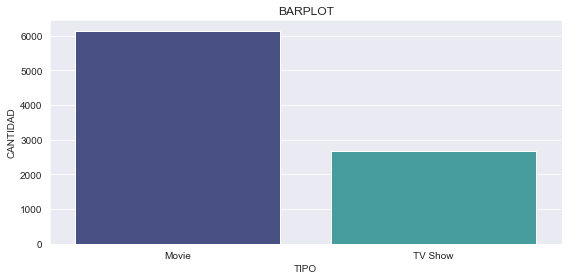

In [8]:
plt.figure(figsize=(8,4), tight_layout=True)
sns.set_style("darkgrid")
ax = sns.countplot(x="type", data=netflix_data, palette="mako")
ax.set(title='BARPLOT', xlabel='TIPO', ylabel='CANTIDAD')
plt.show()

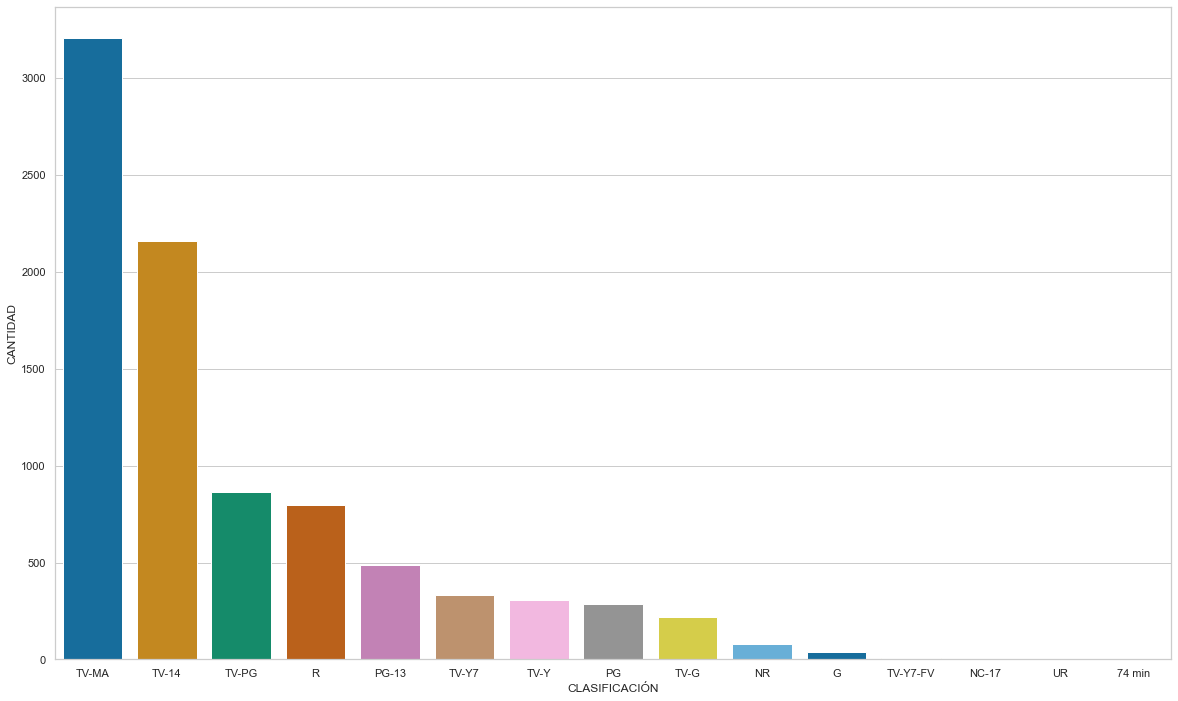

In [9]:
plt.figure(figsize=(20,12))
sns.set(style="whitegrid")
ax = sns.countplot(x="rating", data=netflix_data, palette="colorblind", order=netflix_data['rating'].value_counts().index[0:15])
ax.set(xlabel='CLASIFICACIÓN', ylabel='CANTIDAD')
plt.show()

#### Podemos observar que el contenido para TV-MA(Audiencias Maduras) tiene los números de calificación más altos. El siguiente contendio que tiene números significativamene altos es de TV-14(Material que los padres o tutores adultos pueden encontrar inadecuado para niños menores de 14 años).

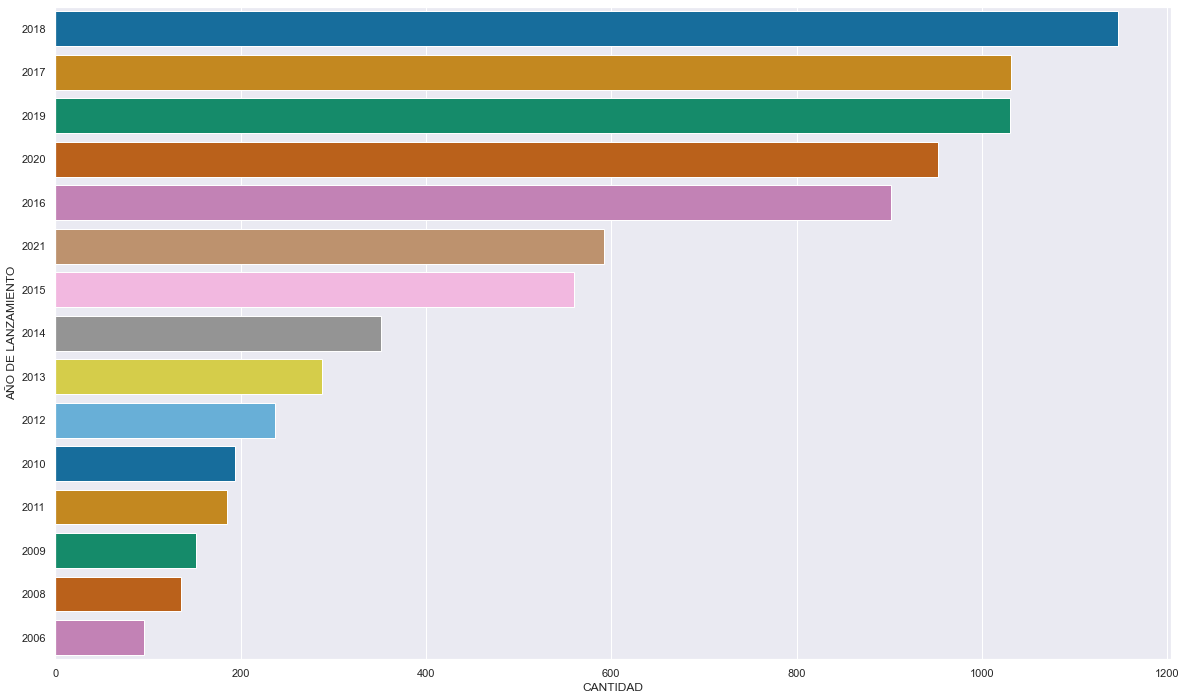

In [10]:
plt.figure(figsize=(20,12))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_data, palette="colorblind", order=netflix_data['release_year'].value_counts().index[0:15])
ax.set(xlabel='CANTIDAD', ylabel='AÑO DE LANZAMIENTO')
plt.show()

#### Podemos observar en el gráfico que los años 2018, 2017 y 2019 son los años en los que se dieron el mayor número de lanzamientos, siendo el 2018 el que se produjo más. Además podemos observar, en el año 2021 se produjeron cantidades menores de lanzamientos debido al COVID-19.

In [13]:
country_count=netflix_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:15]
topcountries

,country
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110
Egypt,106


## SISTEMA DE RECOMENDACIÓN

In [11]:
new_netflix_data = netflix_data.fillna('')  # Transformamos los nulos a Strigs vacios

In [12]:
def data_cleaning(x):
    return str.lower(x.replace(" ", ""))
    # Limpiamos la data y convertimos todas las palabras en minúscula 

In [13]:
features = ['title', 'director', 'cast', 'listed_in', 'description']
   # Seleccionamos las características por el que vamos a filtrar
new_netflix_data = new_netflix_data[features]

In [14]:
for feature in features:
    new_netflix_data[feature] = new_netflix_data[feature].apply(data_cleaning)

new_netflix_data.head(3)

,title,director,cast,listed_in,description
0,dickjohnsonisdead,kirstenjohnson,,documentaries,"asherfathernearstheendofhislife,filmmakerkirst..."
1,blood&water,,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou..."
2,ganglands,julienleclercq,"samibouajila,tracygotoas,samueljouy,nabihaakka...","crimetvshows,internationaltvshows,tvaction&adv...","toprotecthisfamilyfromapowerfuldruglord,skille..."


In [15]:
def content_include(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [16]:
new_netflix_data['joined_columns'] = new_netflix_data.apply(content_include, axis = 1)
    # Se crea una nueva columna, concatenando las demás columnas

#### Se va utilizar CountVectorizer

In [25]:
from sklearn.feature_extraction.text import CountVectorizer #Para ver la frecuencia de cada palabra
from sklearn.metrics.pairwise import cosine_similarity

countvec = CountVectorizer(stop_words='english') # Para quitar palabras irrelevantes
countvec_matrix = countvec.fit_transform(new_netflix_data['joined_columns'])
    #Genera una matriz con la frecuencia de cada palabra que exista en la columna de 'joined_columns'
    #Fit: Parámetro óptimos
countvec_matrix.shape

(8807, 76189)

In [ ]:
cosine_sim = cosine_similarity(countvec_matrix, countvec_matrix)

new_netflix_data=new_netflix_data.reset_index()
indices = pd.Series(new_netflix_data.index, index=new_netflix_data['title'])

In [20]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))
        # Obtiene los puntajes de similitud de pares de todas las películas con esa película

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        # Se ordena las peliculas según las puntuaciones de similitud
    
    sim_scores = sim_scores[1:11]
        # Se obtiene los puntajes de las 10 películas más similares
    movie_indices = [i[0] for i in sim_scores]
    return netflix_data['title'].iloc[movie_indices]

In [21]:
get_recommendations_new('Dark', cosine_sim)

260                 The Defeated
3604                    Sintonia
2053             Young Wallander
3744                     Unit 42
5404           The Truth Seekers
6323                 Black Heart
3789              Killer Ratings
4476       Terrorism Close Calls
4673    Inside the Criminal Mind
3855                  The Writer
Name: title, dtype: object

In [22]:
get_recommendations_new('Ozark', cosine_sim)

678     The Assassination of Gianni Versace
1980                          The Blacklist
1477                                Dare Me
5940                           Breaking Bad
3762                    Designated Survivor
8397           The Lizzie Borden Chronicles
4079                               Unsolved
3684                              Kakegurui
3604                               Sintonia
6841                             Get Shorty
Name: title, dtype: object

In [23]:
get_recommendations_new('The 100', cosine_sim)

2190                           The Umbrella Academy
513                                          Colony
660                                 Black Lightning
3106                                  Lost in Space
3005    DreamWorks How to Train Your Dragon Legends
2227                                         Cursed
3526                                     The I-Land
5069                        The Shannara Chronicles
763                                     Sweet Tooth
993                                 Shadow and Bone
Name: title, dtype: object